In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip /content/drive/MyDrive/traffic_sign/archive.zip -d /content/drive/MyDrive/traffic_sign/Data

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import seaborn as sns

In [4]:
import tensorflow as tf
import keras
print(keras.__version__)

2.8.0


In [5]:
imgs_path = "/content/drive/MyDrive/traffic_sign/Data/Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")

Done


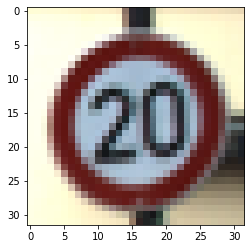

In [6]:
path = "/content/drive/MyDrive/traffic_sign/Data/Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((32, 32))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data, labels, test_size= 0.1, random_state=10)

print("training_shape: ", x_train.shape,y_train.shape)
print("testing_shape: ", x_test.shape,y_test.shape)

#x_train = x_train / 255.0
#x_test = x_test / 255.0

y_train = tf.one_hot(y_train,43)
y_test = tf.one_hot(y_test,43)

training_shape:  (35288, 32, 32, 3) (35288,)
testing_shape:  (3921, 32, 32, 3) (3921,)


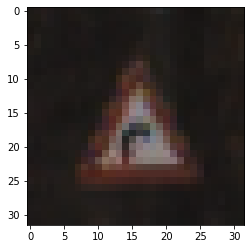

In [15]:
plt.imshow(x_train[0])

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape= x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add((Conv2D(filters=128,kernel_size=(3,3),activation="relu"))) 
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(rate=0.25))
model.add(Flatten()) 
model.add(Dense(1024, activation="relu"))
model.add(Dropout(rate=0.40))
model.add(Dense(43, activation="softmax"))

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/2
 39/552 [=>............................] - ETA: 40:14 - loss: 5.0020 - accuracy: 0.0573

KeyboardInterrupt: ignored

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy Graph")
plt.xlabel("epochs")
plt.ylabel("accuracy (0,1)")
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss Graph")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
 model.save('/content/drive/MyDrive/traffic_sign/model/traffic_signal_classifier.h5')

In [ ]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/content/drive/MyDrive/traffic_sign/Data/Test.csv")
test_labels = test['ClassId'].values
test_img_path = "/content/drive/MyDrive/traffic_sign/Data"
test_imgs = test['Path'].values

test_data = []
test_labels = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((32,32))
    im = np.array(im)
    test_data.append(im)

test_data = np.array(test_data)
print(test_data.shape)

import warnings
warnings.filterwarnings("ignore")
test_labels = test['ClassId'].values
test_labels

In [ ]:
predict_x=model.predict(test_data) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
classes_x

In [ ]:
test_labels

In [ ]:
print("accuracy: ", accuracy_score(test_labels,classes_x))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_labels,classes_x))

In [ ]:
cmat = confusion_matrix(test_labels,classes_x)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

Resnet50

In [18]:
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
#from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.8.2


In [19]:
resnet = ResNet50(weights= None, include_top=False, input_shape= x_train.shape[1:])

In [20]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(43, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [22]:
'''
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)
'''

"\nfrom tensorflow.keras.utils import plot_model\nplot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)\n"

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [25]:
n_epochs = 10
history =  model.fit(x_train, y_train,  batch_size = 64, epochs = n_epochs, verbose = 1, 
              validation_data = (x_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/10
  4/552 [..............................] - ETA: 41:37 - loss: 6.7340 - accuracy: 0.0352

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/traffic_sign/model/TSC_Resnet50_model.h5')

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();  

In [ ]:
predict_x=model.predict(test_data) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
classes_x

In [ ]:
test_labels

In [ ]:
print("accuracy: ", accuracy_score(test_labels,classes_x))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_labels,classes_x))

In [ ]:
cmat = confusion_matrix(test_labels,classes_x)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d");

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(43):
     prec,recall,_,_ = precision_recall_fscore_support(np.array(test_labels)==l,
                                                  np.array(classes_x)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

pd.DataFrame(res,columns = ['class','sensitivity','specificity'])